In [1]:
# Load required libraries
library(readxl)
library(dplyr)
library(broom)

# Read the Excel file
file_path <- "/content/jaggia_ba_2e_ch09_data.xlsx"
data <- read_excel(file_path, sheet = "Complication")

# Fit the logistic regression model
model <- glm(Complication ~ Weight + Age + Diabetes, data = data, family = binomial)

# View the model summary
summary(model)

#a
# Create a new data frame with the patient's characteristics
new_patient <- data.frame(Weight = 180, Age = 60, Diabetes = 1)

# Predict the log-odds
log_odds <- predict(model, newdata = new_patient)

# Convert log-odds to odds
odds <- exp(log_odds)

print(paste("The odds of complications for a 60-year-old diabetic patient weighing 180 pounds are:", round(odds, 3)))


#b
# Update the new patient data frame
new_patient_nondiabetic <- data.frame(Weight = 180, Age = 60, Diabetes = 0)

# Predict the log-odds
log_odds_nondiabetic <- predict(model, newdata = new_patient_nondiabetic)

# Convert log-odds to odds
odds_nondiabetic <- exp(log_odds_nondiabetic)

print(paste("The odds of complications for a 60-year-old non-diabetic patient weighing 180 pounds are:", round(odds_nondiabetic, 3)))

#c
# Calculate the percentage difference
percentage_difference <- (odds - odds_nondiabetic) / odds_nondiabetic * 100

print(paste("The percentage difference in odds between diabetic and non-diabetic patients is:", round(percentage_difference, 2), "%"))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





Call:
glm(formula = Complication ~ Weight + Age + Diabetes, family = binomial, 
    data = data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.090856   1.744391  -4.065 4.80e-05 ***
Weight       0.024129   0.008243   2.927  0.00342 ** 
Age          0.017836   0.009856   1.810  0.07036 .  
Diabetes     1.679598   0.389633   4.311 1.63e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 245.64  on 239  degrees of freedom
Residual deviance: 215.94  on 236  degrees of freedom
AIC: 223.94

Number of Fisher Scoring iterations: 4


[1] "The odds of complications for a 60-year-old diabetic patient weighing 180 pounds are: 1.002"
[1] "The odds of complications for a 60-year-old non-diabetic patient weighing 180 pounds are: 0.187"
[1] "The percentage difference in odds between diabetic and non-diabetic patients is: 436.34 %"


In [5]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [6]:

library(readxl)
library(dplyr)
library(caret)

# Read the Excel file
file_path <- "/content/jaggia_ba_2e_ch09_data.xlsx"
data <- read_excel(file_path, sheet = "Subscription")

# Convert Sex to factor
data$Sex <- as.factor(data$Sex)

#a
# Fit the model
model_a <- glm(Subscribe ~ Discount + Age, data = data, family = binomial)

# Compute predictions
predictions_a <- ifelse(predict(model_a, type = "response") > 0.5, 1, 0)

# Calculate accuracy
accuracy_a <- mean(predictions_a == data$Subscribe)

# Print results
summary(model_a)
cat("\nAccuracy rate for model a:", accuracy_a, "\n")

#b
# Fit the extended model
model_b <- glm(Subscribe ~ Discount + Age + Sex, data = data, family = binomial)

# Compute predictions
predictions_b <- ifelse(predict(model_b, type = "response") > 0.5, 1, 0)

# Calculate accuracy
accuracy_b <- mean(predictions_b == data$Subscribe)

# Print results
summary(model_b)
cat("\nAccuracy rate for model b:", accuracy_b, "\n")

#c
# Create new data for prediction
new_data <- data.frame(
  Discount = c(10, 10),
  Age = c(50, 50),
  Sex = factor(c("Male", "Female"), levels = levels(data$Sex))
)

# Predict probabilities
probabilities <- predict(model_b, newdata = new_data, type = "response")

# Print results
cat("\nPredicted subscription probabilities:\n")
cat("50-year-old male customer with 10% discount:", probabilities[1], "\n")
cat("50-year-old female customer with 10% discount:", probabilities[2], "\n")

Loading required package: ggplot2

Loading required package: lattice




Call:
glm(formula = Subscribe ~ Discount + Age, family = binomial, 
    data = data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.815622   0.456864  -3.974 7.06e-05 ***
Discount     0.148114   0.026072   5.681 1.34e-08 ***
Age          0.020425   0.007563   2.701  0.00692 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.89  on 299  degrees of freedom
Residual deviance: 346.73  on 297  degrees of freedom
AIC: 352.73

Number of Fisher Scoring iterations: 3



Accuracy rate for model a: 0.7066667 



Call:
glm(formula = Subscribe ~ Discount + Age + Sex, family = binomial, 
    data = data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.532078   0.478568  -3.201  0.00137 ** 
Discount     0.147534   0.026318   5.606 2.07e-08 ***
Age          0.020445   0.007632   2.679  0.00739 ** 
SexMale     -0.551733   0.262586  -2.101  0.03563 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.89  on 299  degrees of freedom
Residual deviance: 342.27  on 296  degrees of freedom
AIC: 350.27

Number of Fisher Scoring iterations: 4



Accuracy rate for model b: 0.7333333 

Predicted subscription probabilities:
50-year-old male customer with 10% discount: 0.6019896 
50-year-old female customer with 10% discount: 0.7242207 


In [7]:
library(readxl)
library(caret)
library(dplyr)

# Read the Excel file
file_path <- "/content/jaggia_ba_2e_ch09_data.xlsx"
data <- read_excel(file_path, sheet = "Exercise_9.33")

#a
# Split the data
set.seed(123)  # for reproducibility
train_data <- data[1:75, ]
test_data <- data[76:100, ]

# Model 1: using x1
model1 <- glm(y ~ x1, data = train_data, family = binomial)
predictions1 <- ifelse(predict(model1, newdata = test_data, type = "response") > 0.5, 1, 0)
accuracy1 <- mean(predictions1 == test_data$y)

# Model 2: using x1 and x2
model2 <- glm(y ~ x1 + x2, data = train_data, family = binomial)
predictions2 <- ifelse(predict(model2, newdata = test_data, type = "response") > 0.5, 1, 0)
accuracy2 <- mean(predictions2 == test_data$y)

# Print results
cat("Accuracy of Model 1 (x1 only):", accuracy1, "\n")
cat("Accuracy of Model 2 (x1 and x2):", accuracy2, "\n")

#b
# Determine the preferred model based on accuracy
preferred_model <- if(accuracy2 > accuracy1) model2 else model1

# Re-estimate the preferred model with all data
if(accuracy2 > accuracy1) {
  final_model <- glm(y ~ x1 + x2, data = data, family = binomial)
} else {
  final_model <- glm(y ~ x1, data = data, family = binomial)
}

# Predict probability of success when x1 = 25 and x2 = 50
new_data <- data.frame(x1 = 25, x2 = 50)
predicted_prob <- predict(final_model, newdata = new_data, type = "response")

# Print results
cat("\nPreferred model summary:\n")
print(summary(final_model))
cat("\nPredicted probability of success when x1 = 25 and x2 = 50:", predicted_prob, "\n")


Accuracy of Model 1 (x1 only): 0.68 
Accuracy of Model 2 (x1 and x2): 0.84 

Preferred model summary:

Call:
glm(formula = y ~ x1 + x2, family = binomial, data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.69867    1.67055   2.813 0.004914 ** 
x1           0.11926    0.03505   3.402 0.000668 ***
x2          -0.13103    0.03016  -4.344  1.4e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 131.791  on 99  degrees of freedom
Residual deviance:  88.787  on 97  degrees of freedom
AIC: 94.787

Number of Fisher Scoring iterations: 5


Predicted probability of success when x1 = 25 and x2 = 50: 0.7555839 


In [8]:
library(readxl)
library(caret)
library(pROC)

# Read the Excel file
file_path <- "/content/jaggia_ba_2e_ch09_data.xlsx"
data <- read_excel(file_path, sheet = "Default")

# Convert Default to factor
data$Default <- as.factor(data$Default)

#a
# Split the data
set.seed(123)  # for reproducibility
train_data <- data[1:300, ]
test_data <- data[301:400, ]

# Fit the model
model <- glm(Default ~ LTV + FICO + Age, data = train_data, family = binomial)

# Predict probabilities
pred_probs <- predict(model, newdata = test_data, type = "response")

# Calculate performance measures with cutoff 0.50
predictions <- ifelse(pred_probs > 0.50, 1, 0)
conf_matrix <- confusionMatrix(factor(predictions), test_data$Default, positive = "1")

cat("Performance measures with cutoff 0.50:\n")
cat("Accuracy:", conf_matrix$overall["Accuracy"], "\n")
cat("Sensitivity:", conf_matrix$byClass["Sensitivity"], "\n")
cat("Specificity:", conf_matrix$byClass["Specificity"], "\n\n")

#b
# Calculate proportion of defaults in training set
default_prop <- mean(train_data$Default == 1)

# Calculate performance measures with new cutoff
predictions_prop <- ifelse(pred_probs > default_prop, 1, 0)
conf_matrix_prop <- confusionMatrix(factor(predictions_prop), test_data$Default, positive = "1")

cat("Performance measures with cutoff equal to proportion of defaults:\n")
cat("Cutoff value:", default_prop, "\n")
cat("Accuracy:", conf_matrix_prop$overall["Accuracy"], "\n")
cat("Sensitivity:", conf_matrix_prop$byClass["Sensitivity"], "\n")
cat("Specificity:", conf_matrix_prop$byClass["Specificity"], "\n\n")

#c
# Compare performance measures
cat("Comparison of cutoffs:\n")
cat("Cutoff 0.50 - Accuracy:", conf_matrix$overall["Accuracy"], "\n")
cat("Proportion cutoff -  Accuracy:", conf_matrix_prop$overall["Accuracy"], "\n\n")

# Calculate ROC curve and AUC
roc_curve <- roc(test_data$Default, pred_probs)
auc_value <- auc(roc_curve)

cat("AUC:", auc_value, "\n\n")

cat("Explanation:\n")
if (conf_matrix$overall["Accuracy"] > conf_matrix_prop$overall["Accuracy"]) {
  cat("The cutoff of 0.50 is preferred as it yields higher accuracy.\n")
} else if (conf_matrix$overall["Accuracy"] < conf_matrix_prop$overall["Accuracy"]) {
  cat("The cutoff based on the proportion of defaults is preferred as it yields higher accuracy.\n")
} else {
  cat("Both cutoffs perform similarly in terms of accuracy.\n")
}

cat("\nHowever, the choice of cutoff should also consider the business context:")
cat("\n1. If minimizing false negatives (defaults predicted as non-defaults) is crucial, prefer the cutoff with higher sensitivity.")
cat("\n2. If minimizing false positives (non-defaults predicted as defaults) is important, prefer the cutoff with higher specificity.")
cat("\n3. The AUC value of", round(auc_value, 3), "indicates the model's overall discriminative power, regardless of cutoff.")
cat("\n\nThe final decision should balance these factors along with the specific costs and risks associated with false positives and false negatives in the loan default context.")




Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




Performance measures with cutoff 0.50:
Accuracy: 0.87 
Sensitivity: 0.3333333 
Specificity: 0.9431818 

Performance measures with cutoff equal to proportion of defaults:
Cutoff value: 0.09 
Accuracy: 0.8 
Sensitivity: 0.75 
Specificity: 0.8068182 

Comparison of cutoffs:
Cutoff 0.50 - Accuracy: 0.87 
Proportion cutoff -  Accuracy: 0.8 



Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC: 0.9034091 

Explanation:
The cutoff of 0.50 is preferred as it yields higher accuracy.

However, the choice of cutoff should also consider the business context:
1. If minimizing false negatives (defaults predicted as non-defaults) is crucial, prefer the cutoff with higher sensitivity.
2. If minimizing false positives (non-defaults predicted as defaults) is important, prefer the cutoff with higher specificity.
3. The AUC value of 0.903 indicates the model's overall discriminative power, regardless of cutoff.

The final decision should balance these factors along with the specific costs and risks associated with false positives and false negatives in the loan default context.

Best lambda for Lasso: 0.2850894 
Selected features by Lasso:
 [1] 31.4080931908  4.4617427468  0.0006771950  0.0602221399  0.1340634472
 [6] -0.0015148311  0.0008289511  0.0007771962 -0.0011194655  0.0762568009
[11]  0.0445689644  0.2565670321 -0.0001854376
Lasso RMSE: 14.37318 
Lasso R-squared: 0.3514054 
Number of selected features: 12 

Feature Importance (non-zero coefficients):
       Feature   Importance
1   PrivateYes 4.4617427468
16 perc.alumni 0.2565670321
6    Top25perc 0.1340634472
13         PhD 0.0762568009
5    Top10perc 0.0602221399
15   S.F.Ratio 0.0445689644
8  P.Undergrad 0.0015148311
12    Personal 0.0011194655
9     Outstate 0.0008289511
10  Room.Board 0.0007771962
2         Apps 0.0006771950
17      Expend 0.0001854376


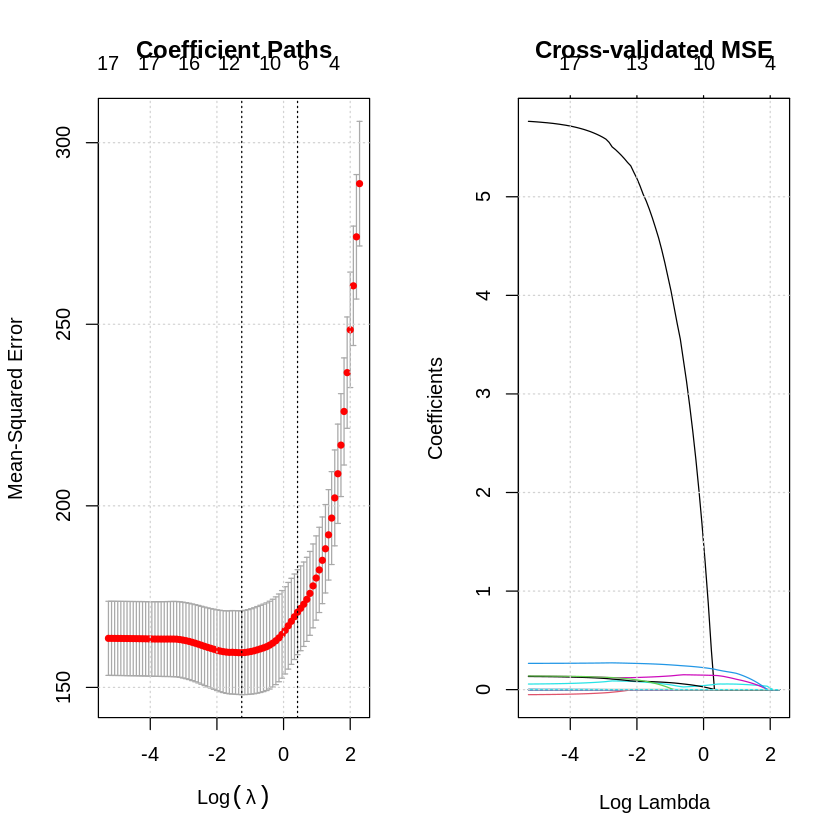

In [15]:
# Load required libraries
library(glmnet)
library(caret)
library(dplyr)

# Read the data
college_data <- read.csv("/content/College.csv", row.names = 1)

# Convert categorical variables to factors
college_data$Private <- as.factor(college_data$Private)

# Split the data into features and target variable
X <- model.matrix(Grad.Rate ~ ., college_data)[,-1]  # Remove intercept
y <- college_data$Grad.Rate

# Split the data into training and testing sets
set.seed(123)
train_indices <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X[train_indices,]
X_test <- X[-train_indices,]
y_train <- y[train_indices]
y_test <- y[-train_indices]

# Fit Lasso regression model
lasso_model <- cv.glmnet(X_train, y_train, alpha = 1)

# Print the best lambda value
cat("Best lambda for Lasso:", lasso_model$lambda.min, "\n")

# Get the coefficients for the best model
lasso_coef <- coef(lasso_model, s = "lambda.min")

# Print non-zero coefficients (selected features)
cat("Selected features by Lasso:\n")
selected_features <- lasso_coef[lasso_coef != 0]
print(selected_features)

# Make predictions on the test set
lasso_pred <- predict(lasso_model, newx = X_test, s = "lambda.min")

# Calculate RMSE for Lasso
lasso_rmse <- sqrt(mean((lasso_pred - y_test)^2))
cat("Lasso RMSE:", lasso_rmse, "\n")

# Calculate R-squared for Lasso
lasso_r_squared <- 1 - sum((y_test - lasso_pred)^2) / sum((y_test - mean(y_test))^2)
cat("Lasso R-squared:", lasso_r_squared, "\n")

# Number of selected features
num_selected_features <- sum(lasso_coef != 0) - 1  # Subtract 1 for intercept
cat("Number of selected features:", num_selected_features, "\n")

# Plot of coefficient paths
par(mfrow=c(1,2))  # Set up a 1x2 plotting area

# Coefficient path plot
plot(lasso_model, main="Coefficient Paths")
grid()

# Cross-validated mean squared error plot
plot(lasso_model$glmnet.fit, xvar="lambda", main="Cross-validated MSE")
points(log(lasso_model$lambda.min), lasso_model$cvm[lasso_model$lambda == lasso_model$lambda.min],
       col="red", pch=19)
grid()

# Reset plotting area
par(mfrow=c(1,1))

# Print feature importance
feature_importance <- abs(coef(lasso_model, s = "lambda.min"))[-1]  # Exclude intercept
feature_names <- rownames(coef(lasso_model))[-1]  # Exclude intercept
feature_importance_df <- data.frame(
  Feature = feature_names,
  Importance = as.vector(feature_importance)
)
feature_importance_df <- feature_importance_df[feature_importance_df$Importance != 0, ]
feature_importance_df <- feature_importance_df[order(-feature_importance_df$Importance), ]

cat("\nFeature Importance (non-zero coefficients):\n")
print(feature_importance_df)